# Trabajo Practico N°2 | Regresión

### Estudiante: Mancuso Augusto Tomás


Luego abrimos el archivo para modificarlo de ser necesario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el CSV y lo asignamos a una variable
df = pd.read_csv('insurance.csv')

# Mostramos los primeros 10 registros como ejemplo
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Estadística Descriptiva para tener una breve idea de los datos

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Visualizamos los campos que presenta el dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Análisis Exploratorio de Datos
 Por otro lado eliminamos las variables no numéricas. Del cuadro anterior podemos ver que los únicos campos no numéricos son "smoker", "sex", "region". Para ello, eliminaremos algunas y reemplazaremos otras por valores numéricos.

In [11]:
# Vamos a eliminar las columnas que no sean numéricas para poder calcular la correlación
df_numerics = df.drop(columns=['region'])
# Converimos la columna 'smoker' a valores numéricos
df_numerics['smoker'] = df_numerics['smoker'].replace({
    'no': 0,
    'yes': 1
})

# Convertimos la columna 'sex' a numérica , al igual que smoker
df_numerics['sex'] = df_numerics['sex'].replace({
    'female': 0,
    'male': 1
})

df_numerics.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


/tmp/ipykernel_3101466/2268404669.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numerics['smoker'] = df_numerics['smoker'].replace({
/tmp/ipykernel_3101466/2268404669.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numerics['sex'] = df_numerics['sex'].replace({


Vamos a checkear si hay datos duplicados, en ese caso los descartaremos.

In [5]:
print(df_numerics.duplicated().sum())

1


Como hay 1 valor duplicado, lo eliminamos

In [6]:
df_numerics = df_numerics.drop_duplicates()

Observaremos cómo se distribuyen los datos del dataset, para ello haremos un histograma. En donde:
- Si la distribución es normal, usaremos el método de **Pearson**.
- Si la distribución no es normal, usaremos el método de **Spearman**.

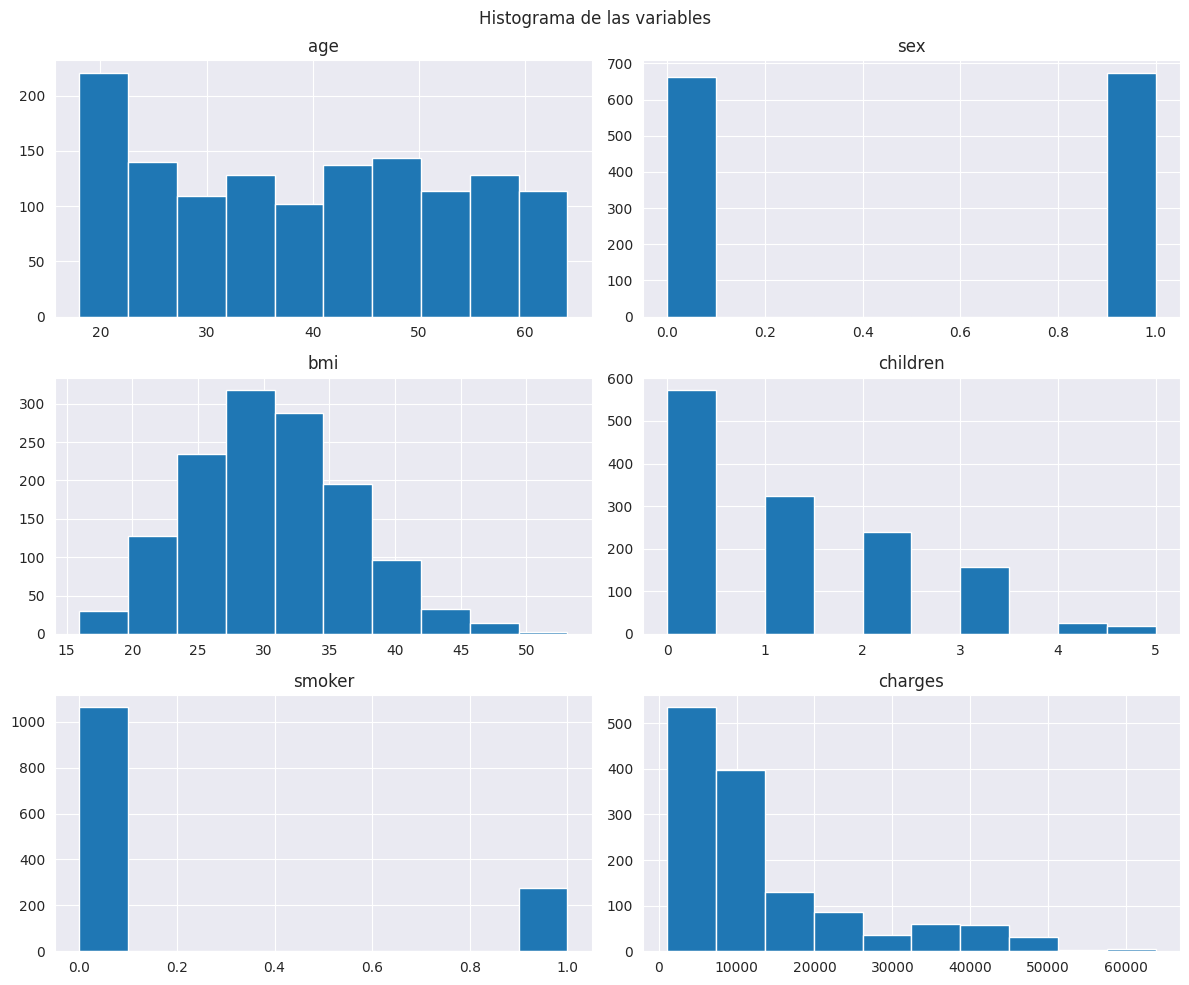

In [10]:
df_numerics.hist(figsize=(12, 10))
plt.suptitle('Histograma de las variables')
plt.tight_layout()
plt.show()

Podemos observar que la única variable que tiene una distribución normal es 'bmi'. Por lo tanto, usaremos el método de **Spearman** para la regresión.

Para verificarlo, usaremos **Shapiro** para calcular la normalidad de las variables.

In [30]:
from scipy.stats import shapiro

for column in df_numerics.columns:
    stat, p = shapiro(df_numerics[column])
    print(f'{column}: p-value={p} - stat={stat}')
    if p > 0.05:
        print(f'{column} tiene una distribución normal')
    else:
        print(f'{column} no tiene una distribución normal')

age: p-value=2.59114479221169e-18 - stat=0.9420248892090514
age no tiene una distribución normal
sex: p-value=5.8176012279129946e-40 - stat=0.6361850936780957
sex no tiene una distribución normal
bmi: p-value=1.8895085815919566e-08 - stat=0.9838265317135382
bmi no tiene una distribución normal
children: p-value=4.567541212560912e-31 - stat=0.8134334238274564
children no tiene una distribución normal
smoker: p-value=4.127960609958011e-53 - stat=0.14185468140055368
smoker no tiene una distribución normal
charges: p-value=6.03704219540711e-16 - stat=0.9553776787342839
charges no tiene una distribución normal


#### Conclusión: Ninguna columna tiene una distribución normal.

Buscaremos la presencia de datos apartados. Para ello, usaremos un diagrama de caja.

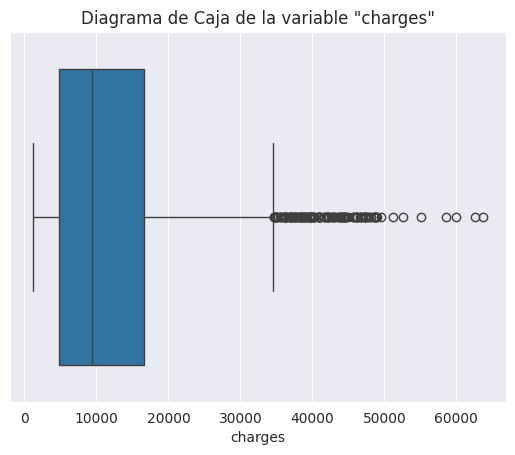

In [17]:
sns.boxplot(data=df_numerics['charges'], orient='h')
plt.title('Diagrama de Caja de la variable "charges"')
plt.show()

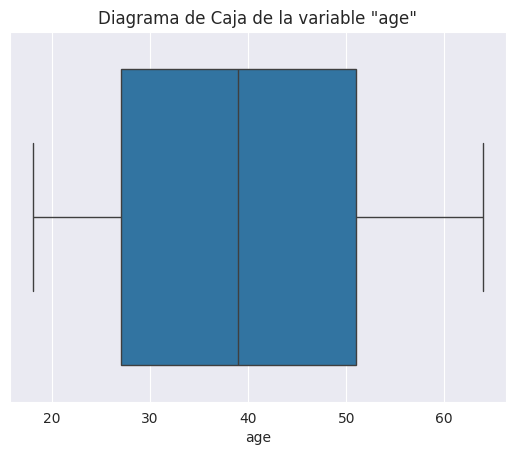

In [18]:
sns.boxplot(data=df_numerics['age'], orient='h')
plt.title('Diagrama de Caja de la variable "age"')
plt.show()

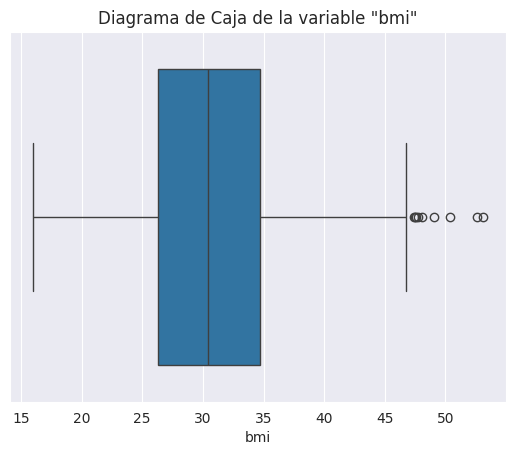

In [19]:
sns.boxplot(data=df_numerics['bmi'], orient='h')
plt.title('Diagrama de Caja de la variable "bmi"')
plt.show()

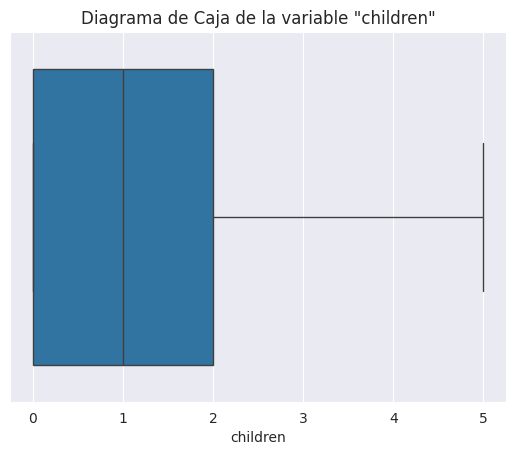

In [20]:
sns.boxplot(data=df_numerics['children'], orient='h')
plt.title('Diagrama de Caja de la variable "children"')
plt.show()

Como se observó en los gráficos anteriores, las variables 'charges' y 'bmi' tienen valores atípicos. Por lo tanto, eliminaremos los valores atípicos de estas variables.

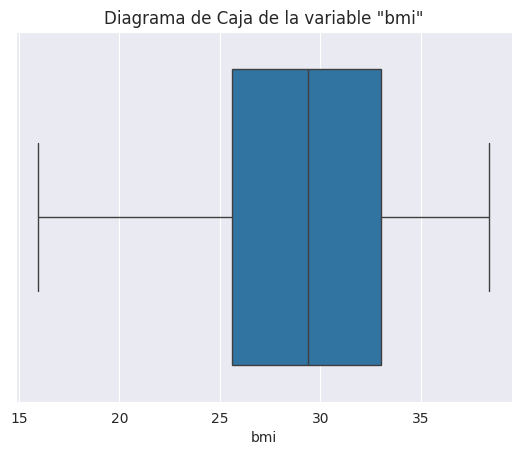

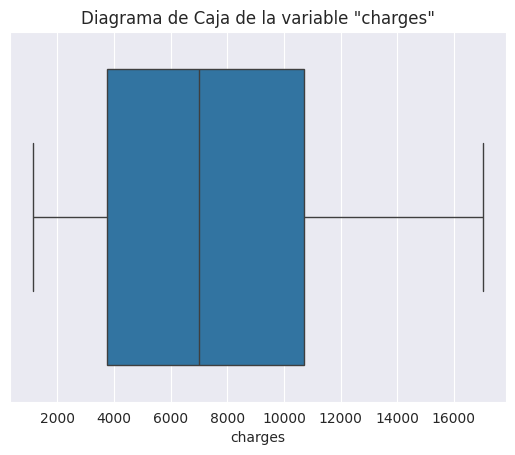

In [24]:
#Eliminamos los outliers

def contar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_down = df[df[column] < lower_bound].shape[0]
    outliers_up = df[df[column] > upper_bound].shape[0]
    total_outliers = outliers_down + outliers_up
   
    return  total_outliers, outliers_down, outliers_up


total_outliers_bmi, outliers_down_bmi, outliers_up_bmi = contar_outliers(df, 'bmi')
total_outliers_charges, outliers_down_charges, outliers_up_charges = contar_outliers(df, 'charges')

def eliminar_outliers(df, column, up, down,factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    if up !=0:
        df = df[df[column] <= upper_bound]
    elif down !=0:
        df = df[df[column] >= lower_bound]
    return df

df_numerics = eliminar_outliers(df_numerics, 'charges', outliers_up_charges, outliers_down_charges, factor=0.6)
df_numerics = eliminar_outliers(df_numerics, 'bmi', outliers_up_bmi, outliers_down_bmi)

sns.boxplot(data=df_numerics['bmi'], orient='h')
plt.title('Diagrama de Caja de la variable "bmi"')
plt.show()

sns.boxplot(data=df_numerics['charges'], orient='h')
plt.title('Diagrama de Caja de la variable "charges"')
plt.show()

Ahora, crearemos mapas de correlación que nos permitirán ver la relación entre las variables para luego poder obtener las variables para nuestro modelos. Dado que no siguen distribuciones normales, usaremos Spearman.

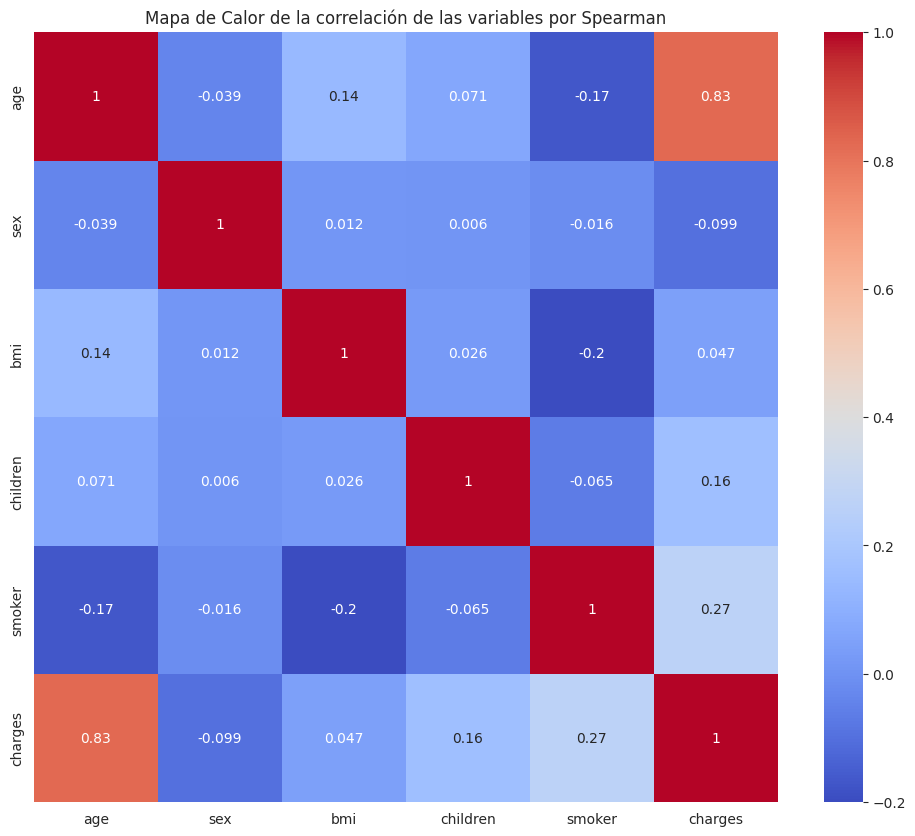

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_numerics.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la correlación de las variables por Spearman')
plt.show()

Según el gráfico de calor, podemos observar que la variable "charges" está más correlacionada con "smoker" y "age". Por lo tanto, seleccionaremos estas variables para nuestro modelo. En donde una correlación cercana a 1 indica una relación lineal positiva; en donde si una variable aumenta, la otra también lo hace.

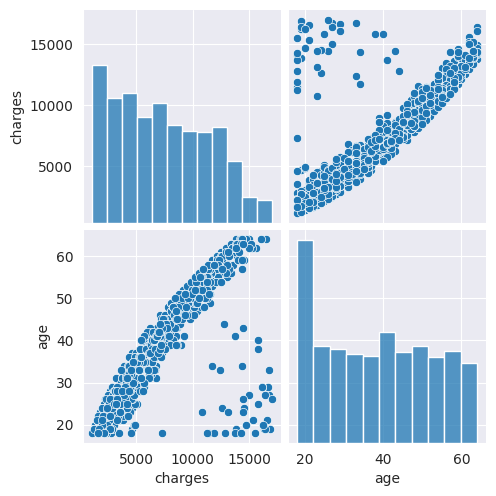

In [33]:
sns.pairplot(df_numerics[['charges', 'age']])

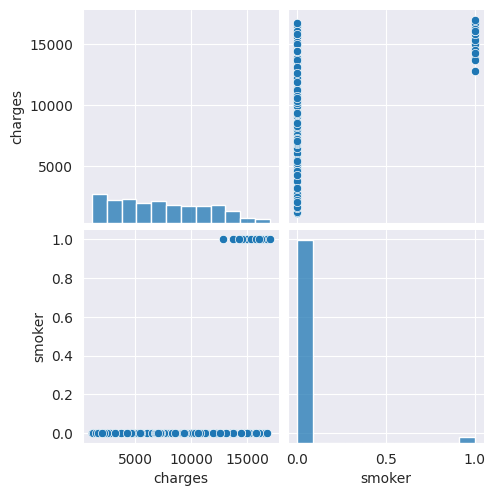

In [34]:
sns.pairplot(df_numerics[['charges', 'smoker']])

## Modelo de Regresión Lineal

Primero prepararemos los datos, escalar los datos y divídelos en conjuntos de entrenamiento y prueba. Para ello solo usaremos al principio 'charges' como variable dependiente y 'age'  como variable independiente.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_numerics[['age']]
Y = df_numerics[['charges']]


# Escalar los datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

# Dividir los datos en entrenamiento y prueba


#### Dataset de entrenamiento y testeo

Text(0.5, 1.0, 'Conjunto de Entrenamiento y Testeo')

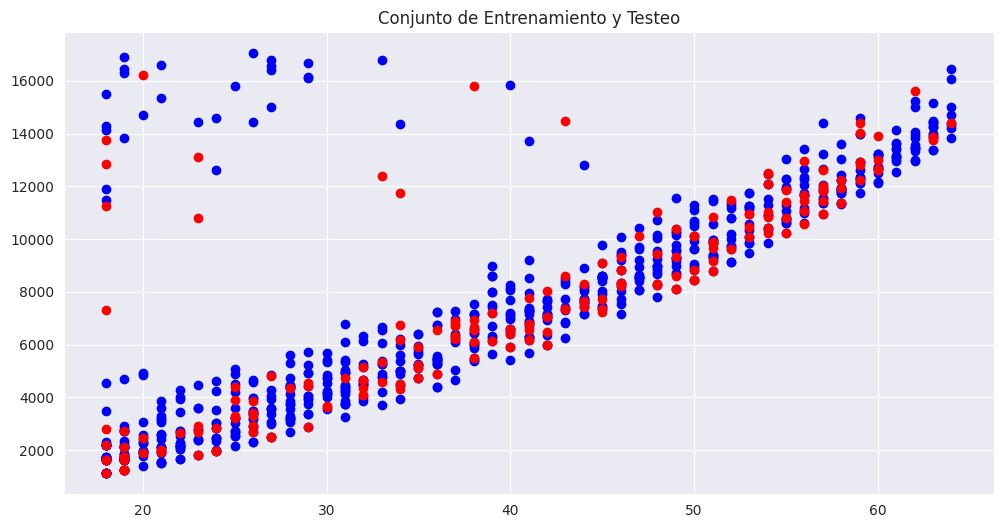

In [39]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test, y_test, color='red', label='Testeo')
plt.title('Conjunto de Entrenamiento y Testeo')

Entrenar y evaluar el modelo de regresión lineal univariable

#### Modelo de Regresión Lineal uni-variable

Mean Squared Error: 3050952.803849024
R^2 Score: 0.8015531902665924
MAE:  987.369388413174


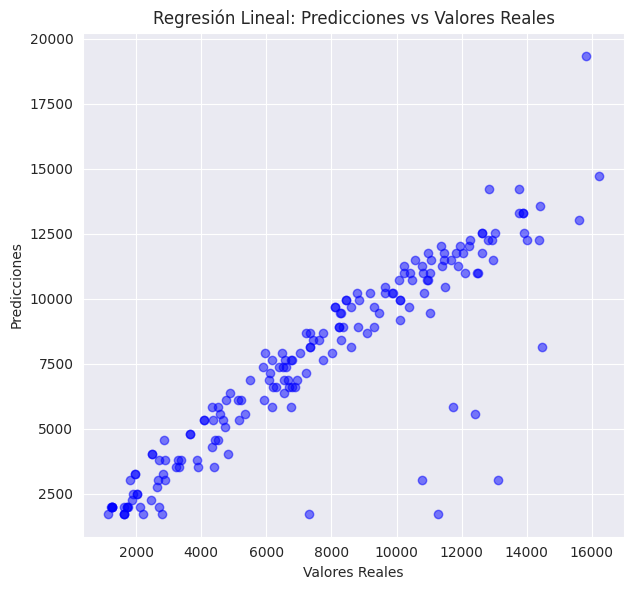

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics as ms

# Crear y entrenar el modelo
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model_lr.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))
print('MAE: ', ms.mean_absolute_error(y_test, y_pred))


# Gráfico de las predicciones versus los valores reales para Regresión Lineal
plt.figure(figsize=(12, 6))

# Predicciones vs Valores Reales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Predicciones vs Valores Reales')

plt.tight_layout()
plt.show()

#### Modelo de Regresión Lineal multi-variable
Elegimos las variables 'charge', 'age' y 'smoker' para nuestro modelo de regresión lineal multi-variable.

Mean Squared Error (Multi): 3050952.803849024
R^2 Score (Multi): 0.8015531902665924
MAE:  987.369388413174


Text(0.5, 1.0, 'Regresión Lineal Multi-variable: Predicciones vs Valores Reales')

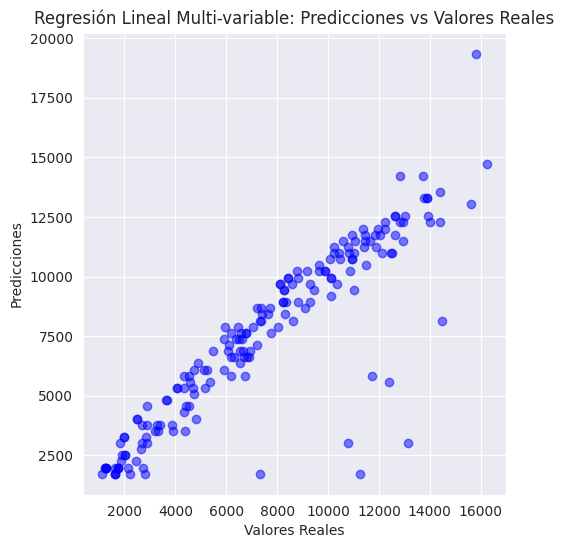

In [48]:
X = df_numerics[['age', 'smoker']]
Y = df_numerics[['charges']]

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model_lr_multi = LinearRegression()
model_lr_multi.fit(X_train, y_train)

y_pred_multi = model_lr_multi.predict(X_test)
print('Mean Squared Error (Multi):', mean_squared_error(y_test, y_pred_multi))
print('R^2 Score (Multi):', r2_score(y_test, y_pred_multi))
print('MAE: ', ms.mean_absolute_error(y_test, y_pred_multi))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_multi, color='blue', alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal Multi-variable: Predicciones vs Valores Reales')


##  Modelo de Regresión con SVR y Decision Tree

In [24]:
# SVR

from sklearn.svm import SVR

# Crear y entrenar el modelo SVR
model_svr = SVR()
model_svr.fit(X_train, y_train)

# Predecir y evaluar
y_pred_svr = model_svr.predict(X_test)
print('Mean Squared Error (SVR):', mean_squared_error(y_test, y_pred_svr))
print('R^2 Score (SVR):', r2_score(y_test, y_pred_svr))


Mean Squared Error (SVR): 166529037.01267877
R^2 Score (SVR): -0.072659566442274


In [25]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

# Crear y entrenar el modelo Decision Tree
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# Predecir y evaluar
y_pred_dt = model_dt.predict(X_test)
print('Mean Squared Error (Decision Tree):', mean_squared_error(y_test, y_pred_dt))
print('R^2 Score (Decision Tree):', r2_score(y_test, y_pred_dt))



Mean Squared Error (Decision Tree): 309702375.35055816
R^2 Score (Decision Tree): -0.9948786207439577


## Gráficos para Regresión Lineal

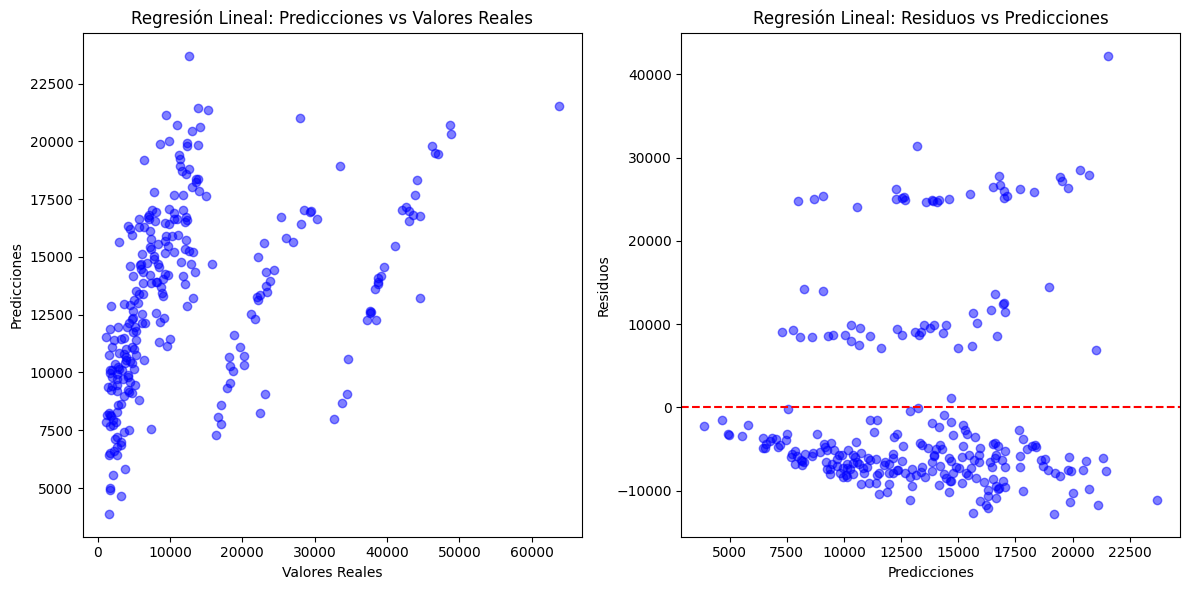

In [26]:
# Gráfico de las predicciones versus los valores reales para Regresión Lineal
plt.figure(figsize=(12, 6))

# Predicciones vs Valores Reales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Predicciones vs Valores Reales')

# Gráfico de residuos
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Regresión Lineal: Residuos vs Predicciones')

plt.tight_layout()
plt.show()


## Gráficos para SVR


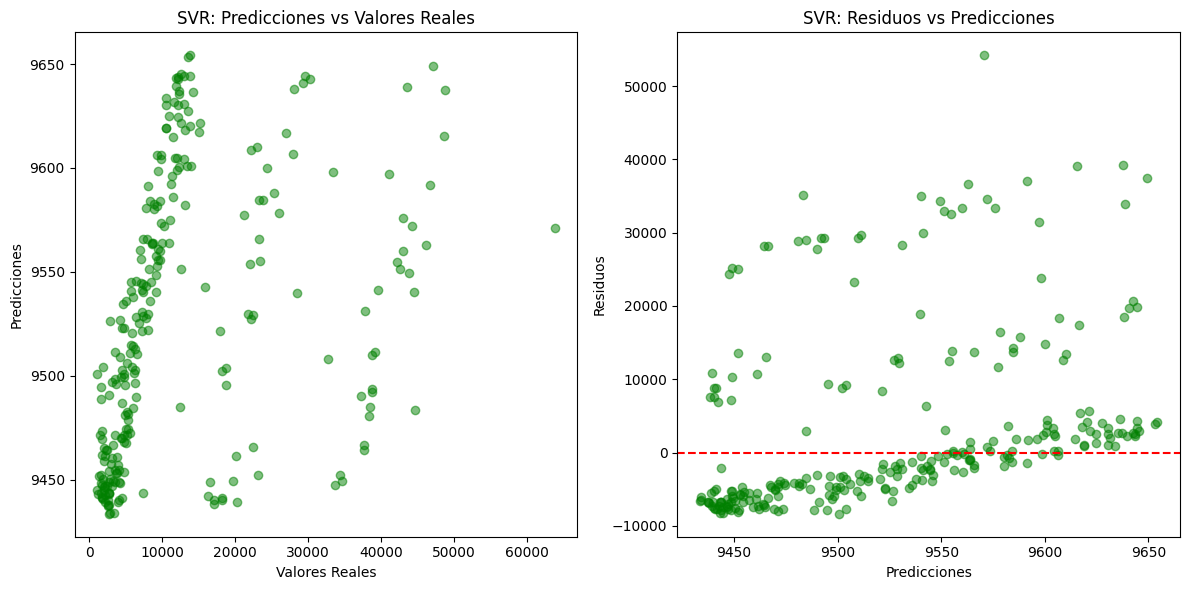

In [27]:
# Gráfico de las predicciones versus los valores reales para SVR
plt.figure(figsize=(12, 6))

# Predicciones vs Valores Reales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, color='green', alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('SVR: Predicciones vs Valores Reales')

# Gráfico de residuos
plt.subplot(1, 2, 2)
residuals_svr = y_test - y_pred_svr
plt.scatter(y_pred_svr, residuals_svr, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('SVR: Residuos vs Predicciones')

plt.tight_layout()
plt.show()


## Gráficos para Decision Tree

In [ ]:
# Gráfico de las predicciones versus los valores reales para Decision Tree
plt.figure(figsize=(12, 6))

# Predicciones vs Valores Reales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, color='orange', alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Decision Tree: Predicciones vs Valores Reales')

# Gráfico de residuos
plt.subplot(1, 2, 2)
residuals_dt = y_test - y_pred_dt
plt.scatter(y_pred_dt, residuals_dt, color='orange', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Decision Tree: Residuos vs Predicciones')

plt.tight_layout()
plt.show()
